## IMPORT LIBRARIES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
# Model  Building
from sklearn.neighbors import KNeighborsClassifier
# Model Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv('E:\ExcelR Assignment\Assignment 13 - KNN\Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.shape

(101, 18)

In [7]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<AxesSubplot:>

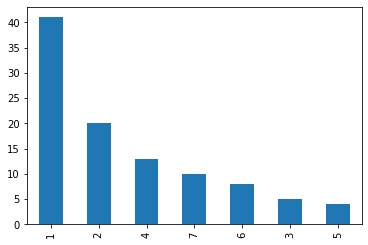

In [8]:
df['type'].value_counts().plot(kind='bar')

## 1. Data Analysis & Data Visualization

In [9]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [29]:
df1 = df.copy()

In [30]:
df1 = df1.drop(['animal name'],axis=1)
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Splitting the variables

In [31]:
X = df1.iloc[0:91,0:-1]
Y = df1.iloc[0:91:,-1]

## Up-sampling as the Target Variable is not balanced

In [32]:
import smote_variants as sv
oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())
X_samp, y_samp= oversampler.sample(X, Y)

2021-04-09 19:33:06,166:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2021-04-09 19:33:06,166:INFO:MulticlassOversampling: Sampling minority class with label: 2
2021-04-09 19:33:06,181:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2021-04-09 19:33:06,181:INFO:MulticlassOversampling: Sampling minority class with label: 4
2021-04-09 19:33:06,181:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4032258064516129, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2021-04-09 19:33:06,197:INFO:MulticlassOversampling: Sampling minority class with label: 7
2021-04-09 19:33:06,197:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.27450980392156865, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2021-04-09 19:33:06,197:INFO:MulticlassOversampling: Sampling minority class with label: 6

## Train-Test Split Model Validation Technique

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## Transforming Variables

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

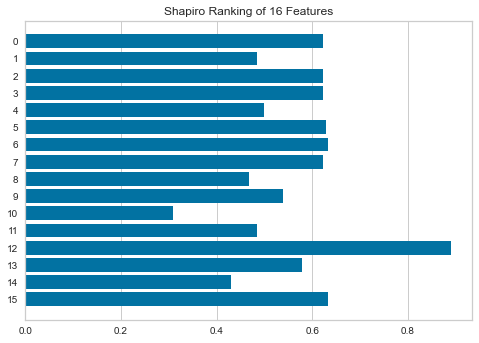

<AxesSubplot:title={'center':'Shapiro Ranking of 16 Features'}>

In [36]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X_train, y_train)                  # Fit the data to the visualizer
visualizer.transform(X_train)                     # Transform the data
visualizer.show()

## Build KNN model

In [37]:
kmodel = KNeighborsClassifier()
param_grid = [{'n_neighbors':range(2,20)}]
gsv = GridSearchCV(kmodel,param_grid)
gsv.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 20)}])

In [38]:
gsv.best_params_,gsv.best_score_

({'n_neighbors': 2}, 0.9723809523809525)

In [39]:
result1 = []
result2 = []
for n in range(2,20):
    model = KNeighborsClassifier(n_neighbors=n,metric='euclidean')
    model.fit(X_train,y_train)
    result1.append(model.score(X_train,y_train))
    result2.append(model.score(X_test,y_test))
frame = pd.DataFrame({'n_neighbors':range(2,20),'Train Accuracy':result1,'Test Accuracy':result2})
frame

,n_neighbors,Train Accuracy,Test Accuracy
0,2,0.986111,0.842105
1,3,0.986111,0.842105
2,4,0.972222,0.842105
3,5,0.972222,0.842105
4,6,0.972222,0.789474
5,7,0.958333,0.789474
6,8,0.930556,0.789474
7,9,0.916667,0.789474
8,10,0.916667,0.842105
9,11,0.916667,0.789474


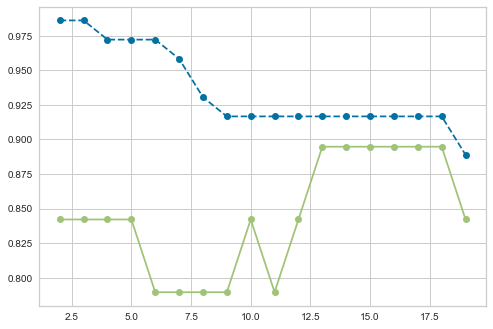

In [40]:
plt.plot(frame['n_neighbors'],frame['Train Accuracy'],marker='o',linestyle='dashed')
plt.plot(frame['n_neighbors'],frame['Test Accuracy'],marker='o')

In [43]:
model = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
model.fit(X_train,y_train)
result1 = model.score(X_train,y_train)
result2 = model.score(X_test,y_test)

In [44]:
result1,result2

(0.9166666666666666, 0.8947368421052632)

In [45]:
x_val = df.iloc[-10:,1:-1]
y_val = df.iloc[-10:,-1]

In [46]:
model.score(x_val,y_val)

0.9